In [2]:
import numpy as np
import matplotlib.pyplot as plt
import fitsio

In [3]:
filename = 'summary_dr9/fba_summary_bright_full_dr9.fits'
filein = fitsio.FITS(filename, 'r')
data = filein[1].read()
filein.close()

In [17]:
is_BGS = data['isBGS_ANY']
never_available = (data['NAVAIL_FIBER']==0)
got_fiber = (data['NUMOBS']>0)


In [20]:
print(np.count_nonzero(is_BGS))
print(np.count_nonzero(is_BGS&(~never_available)))
print(np.count_nonzero(is_BGS&(~never_available)&got_fiber))

27292432
20382083
16787366


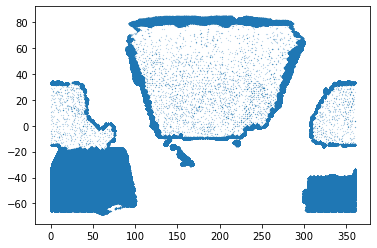

In [21]:
plt.scatter(data['RA'][is_BGS&never_available], data['DEC'][is_BGS&never_available],s=0.01)

In [23]:
efficiency = np.count_nonzero(is_BGS&(~never_available)&got_fiber)/(np.count_nonzero(is_BGS&(~never_available)))
print(efficiency)

0.8236334824070729


(array([      0.,  568610., 2693471., 8334437., 5925763., 2218756.,
         538660.,  101227.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 8 Patch objects>)

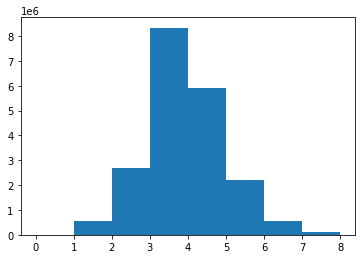

In [27]:
plt.hist(data['NAVAIL_FIBER'][is_BGS&(~never_available)], bins=np.arange(9))